Assuming the principal moments of inertia $A$, $B$, and $C$ are distinct with $A > B > C$, then all possible torque-free motions of the system can be classified into three distinct types.

1.  Stable precession: The body rotates primarily around the axis of either the largest moment of inertia $OX$ or the smallest moment of inertia $OZ$. The angular velocity vector precessess, tracing closed loop around the stable axis in phase space. The object spins stably without tumbling or flipping and the spin axis maintains its overall orientation.

2.  The separatrix: This is the unique, unstable theoretical solution between the two regions. It is not a periodic motion. It represents a trajectory that starts infinitely close to the unstable intermediate axis $OY$ at negative infinity, moves away, and then asymptotically approaches the same axis spinning in the opposite direction as time goes to infinity. This is physically unrealisable.

3.  Unstable tumbling: This unstable motion occurs when the body attempts to rotate about its intermediate axis $OY$. The angular velocity vector follows a large, periodic trajectory in phase space that starts near the $OY$-axis, is repelled, travels a long path, and approaches the $OY$-axis from the opposite direction before repeating the cycle. The object begins spinning, performs a sudden flip and spins in the opposite direction before flipping back. This tumbling is periodic.

The solution space can be visualised by considering the two conserved quantities. Energy defines an ellipsoid
\begin{equation}
    A\omega_1^2 + B\omega_2^2 + C\omega_3^2 = 2E,
\end{equation}
and angular momentum squared also defines an ellipsoid
\begin{equation}
    A^2\omega_1^2 + B^2\omega_2^2 + C^2\omega_3^2 = H^2.
\end{equation}
The tip of the angular velocity vector $\omega$ must lie on the intersection of these two surfaces. The separatrix $H^2 = 2EB$ divides the energy ellipsoid into distinct regions.

1.  $H^2 < 2EB$: The intersection of the two ellipsoids results in two separate, closed loops—one around the $OX$-axis and one around the $OZ$-axis. Any trajectory starting within one of these loops is trapped there forever. As we approach the boundary, the stable precession loops become wider and longer. The period of the precession approaches infinity.

2. $H_2 = 2EB$: The intersection of the two ellipsoids here forms two loops which intersect at one point non-smoothly.

3.  $H^2 > 2EB$: he intersection of the two ellipsoids forms a single continuous band that encircles the body, passing through both the positive and negative $OY$-axis regions. As we approach the boundary, the tumbling motion slows down. The object spends more time spinning almost-stably near the $OY$-axis before it eventually flips. The period of the tumbling motion approaches infinity.

The choice of the inertia ratios $A/B$ and $C/B$ does not change the qualitative classification of motion. There will always be two stable axes, one intermediate unstable axis, and a separatrix dividing the motions. However, the precession frequencies for stable motion and the growth rate of the instability are all directly dependent on the differences between $A$, $B$, and $C$.

*   For a highly asymmetric body where the ratios are very different, there are large differences between its moments of inertia. This makes the precession frequencies and the instability growth rate large. The stable spin will wobble rapidly, and the unstable spin will flip over very quickly.

*   For a nearly symmetric body, there will be very small differences between its moments of inertia. This makes the precession frequencies and the instability growth rate very small. The stable spin will have a very slow wobble with a long period. The unstable spin will also take a very long time to develop its flip.

---

The rigid body is now subjected to a slow friction via a retarding couple
$-k\omega$, where $k$ is a very small parameter. The governing equation for a rigid body with this friction is
\begin{equation}
    \frac{dh}{dt} + \omega \wedge h = -k\omega.
\end{equation}
The friction term is added to each of Euler's equations
\begin{equation}
    \begin{cases}
        A \frac{d\omega_1}{dt} + (C - B)\omega_2\omega_3 = -k\omega_1, \\
        B \frac{d\omega_2}{dt} + (A - C)\omega_3\omega_1 = -k\omega_2, \\
        C \frac{d\omega_3}{dt} + (B - A)\omega_1\omega_2 = -k\omega_3.
    \end{cases}
\end{equation}

Since there is now an external (non-conservative) torque, energy and angular momentum are no longer conserved. Their values will decrease over time. We can find their rate of change
\begin{equation}
    \frac{dE}{dt} = \frac{1}{2}\frac{d}{dt}(A\omega_1^2 + B\omega_2^2 + C\omega_3^2) = A\omega_1\frac{d\omega_1}{dt} + B\omega_2\frac{d\omega_2}{dt} + C\omega_3\frac{d\omega_3}{dt}.
\end{equation}
Substituting the modified Euler's equations and simplifying shows that the internal torque terms cancel out, leaving only the friction terms
\begin{equation}
    \frac{dE}{dt} = -k(\omega_1^2 + \omega_2^2 + \omega_3^2) = -k|\omega|^2.
\end{equation}
Since $k > 0$, the energy of the system will continuously decrease. Secondly,
\begin{equation}
    \frac{dH^2}{dt} = \frac{d}{dt}(A^2\omega_1^2 + B^2\omega_2^2 + C^2\omega_3^2) = 2\left(A^2\omega_1\frac{d\omega_1}{dt} + B^2\omega_2\frac{d\omega_2}{dt} + C^2\omega_3\frac{d\omega_3}{dt}\right).
\end{equation}
Again, substituting the modified equations, the internal terms cancel, leaving
\begin{equation}
    \frac{dH^2}{dt} = -2k(A\omega_1^2 + B\omega_2^2 + C\omega_3^2) = -4kE.
\end{equation}
Since $k > 0$ and $E \geq 0$, the magnitude of the angular momentum vector will also continuously decrease.

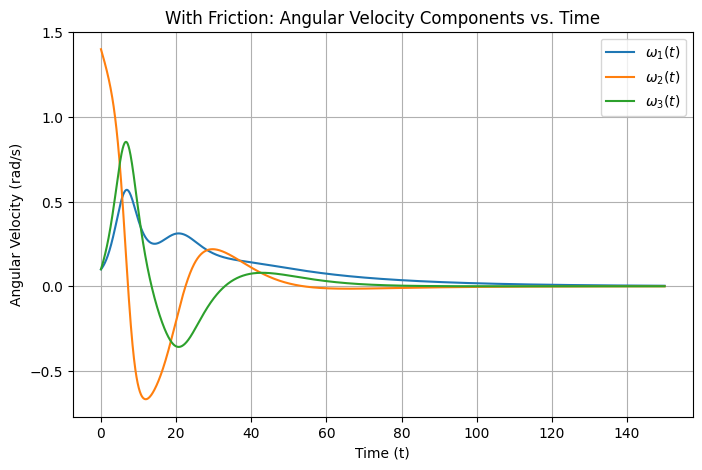

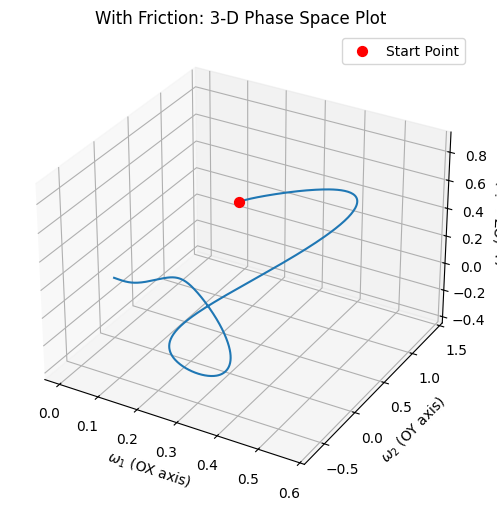

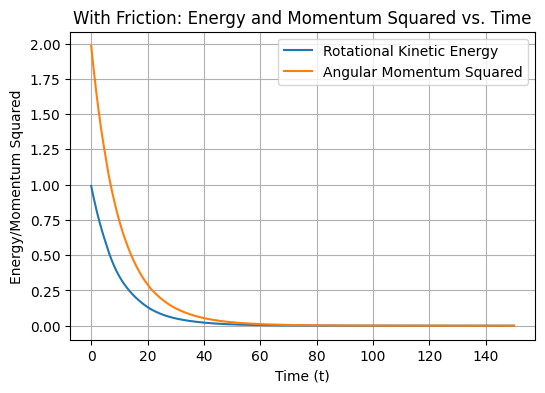

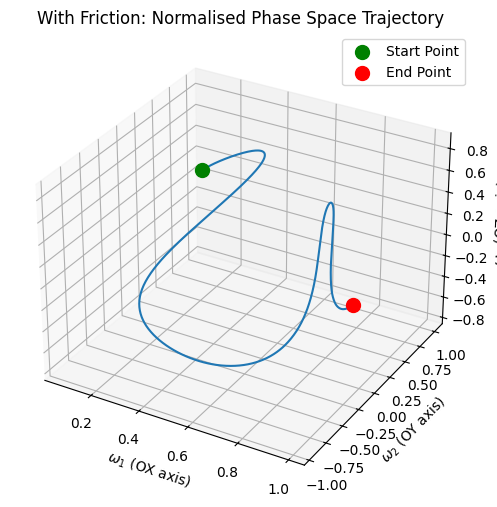

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def euler_equations_with_friction(t, w, params, k):
    '''
    Euler's equations with an added linear friction term -kω.
    '''
    A, B, C = params
    w1, w2, w3 = w
    # Original Euler terms
    dw1dt_nf = (B - C) / A * w2 * w3
    dw2dt_nf = (C - A) / B * w3 * w1
    dw3dt_nf = (A - B) / C * w1 * w2
    # Add friction
    dw1dt = dw1dt_nf - (k / A) * w1
    dw2dt = dw2dt_nf - (k / B) * w2
    dw3dt = dw3dt_nf - (k / C) * w3
    return [dw1dt, dw2dt, dw3dt]

def calculate_energy(w, params):
    '''
    Calculates the rotational kinetic energy (E).
    '''
    A, B, C = params
    w1, w2, w3 = w
    return 0.5 * (A * w1**2 + B * w2**2 + C * w3**2)

def angular_momentum_sq(w, params):
    '''
    Calculates the angular momentum squared (H^2).
    '''
    A, B, C = params
    w1, w2, w3 = w
    return (A * w1)**2 + (B * w2)**2 + (C * w3)**2

def plot_simulation_results(t, w_components, params, title_prefix=""):
    '''
    Generates and displays both the time series and phase space plots.
    '''
    w1, w2, w3 = w_components

    plt.figure(figsize=(8, 5))
    plt.plot(t, w1, label=f'$ω_1(t)$')
    plt.plot(t, w2, label=f'$ω_2(t)$')
    plt.plot(t, w3, label=f'$ω_3(t)$')
    plt.title(f"{title_prefix}: Angular Velocity Components vs. Time")
    plt.xlabel("Time (t)")
    plt.ylabel("Angular Velocity (rad/s)")
    plt.legend()
    plt.grid(True)
    plt.show()

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(w1, w2, w3)
    ax.scatter(w1[0], w2[0], w3[0], color='red', s=50, label='Start Point')
    ax.set_title(f"{title_prefix}: 3-D Phase Space Plot")
    ax.set_xlabel(f"$ω_1$ (OX axis)")
    ax.set_ylabel(f"$ω_2$ (OY axis)")
    ax.set_zlabel(f"$ω_3$ (OZ axis)")
    ax.legend()
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(t, calculate_energy(w_components, params), label="Rotational Kinetic Energy")
    plt.plot(t, angular_momentum_sq(w_components, params), label="Angular Momentum Squared")
    plt.title(f"{title_prefix}: Energy and Momentum Squared vs. Time")
    plt.xlabel("Time (t)")
    plt.ylabel("Energy/Momentum Squared")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_normalised_phase_space(w_components, title_prefix=""):
    '''
    Generates a 3D plot of the normalised angular velocity vector.
    '''
    norm = np.sqrt(w_components[0,:]**2 + w_components[1,:]**2 + w_components[2,:]**2)
    # Avoid division by zero at the end of the simulation
    norm[norm < 1e-9] = 1
    w1_n, w2_n, w3_n = w_components / norm

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(w1_n, w2_n, w3_n)
    ax.scatter(w1_n[0], w2_n[0], w3_n[0], color='green', s=100, label='Start Point')
    ax.scatter(w1_n[-1], w2_n[-1], w3_n[-1], color='red', s=100, label='End Point')
    ax.set_title(f"{title_prefix}: Normalised Phase Space Trajectory")
    ax.set_xlabel(f"$ω_1$ (OX axis)")
    ax.set_ylabel(f"$ω_2$ (OY axis)")
    ax.set_zlabel(f"$ω_3$ (OZ axis)")
    ax.legend()
    plt.show()

def run_simulation_with_friction(params, w_initial, t_span, k, title):
    '''
    Runs the simulation with the specified parameters and initial conditions.
    '''
    t_eval = np.linspace(t_span[0], t_span[1], 2000)
    solution = solve_ivp(
        euler_equations_with_friction,
        t_span,
        w_initial,
        args=(params, k),
        dense_output=True,
        t_eval=t_eval
    )
    plot_simulation_results(solution.t, solution.y, params, title)
    plot_normalised_phase_space(solution.y, title)



if __name__ == "__main__":
    A, B, C = 1.4, 1.0, 0.7
    principal_moments = (A, B, C)
    k = 0.05
    time_span = [0, 150]
    w_initial = [0.1, 1.4, 0.1]
    run_simulation_with_friction(principal_moments, w_initial, time_span, k, "With Friction")

A rigid body with internal energy dissipation will always evolve towards a state of pure rotation about its axis of maximum principal moment of inertia.
This happens because, for a given amount of kinetic energy, the rate of energy dissipation is minimised when the magnitude of the angular velocity is minimised.

The classification from before no longers determines the long-term behaviour of a trajectory due to loss of energy, but it is still useful for describing the transient behavior of the system. There is only one final state for all possible starting conditions.

No, in the presence of friction, there is no longer a strict, permanent division of the solution space into regions. This is because the quantities $E$ and $H^2$ are no longer conserved and are functions of time and may go through different phases of motion.

In a dissipative system, we must consider the basins of attraction for which the final state will be attracted to. The axis of maximum inertia $OX$ acts as the primary attractor, almost encompassing the entire phase space. Any motion will eventually be captured by this axis and will settle into a stable spin around it before finally decaying to rest. The axis of minimum inertia $OZ$ is also stable, but it has a much smaller basin of attraction. Only a trajectory starting very close to the $OZ$-axis will remain there as it decays. The intermediate axis $OY$ is an unstable point and has no basin of attraction at all. Indeed, linearisation shows that we either have a damped harmonic oscillator or an unstable system with damping.